In [1]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filtering the data for Data Analyst jobs in the United States and cleaning it up.
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()


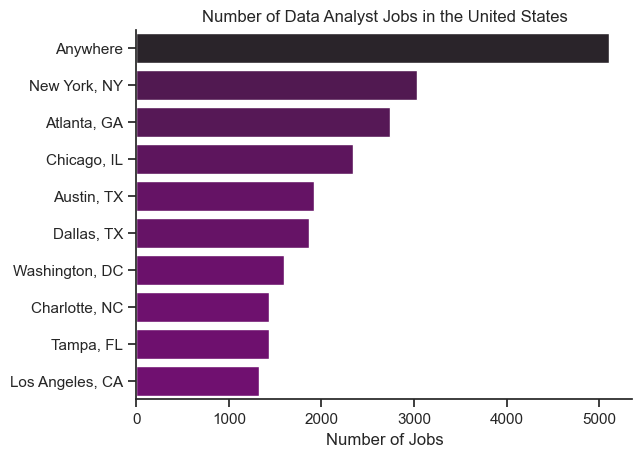

In [3]:
# Number jobs based on the top 10 different locations in the United States.
df_location = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_location, x='count', y='job_location', hue='count', palette='dark:purple_r', legend=False)
sns.despine()
plt.title('Number of Data Analyst Jobs in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

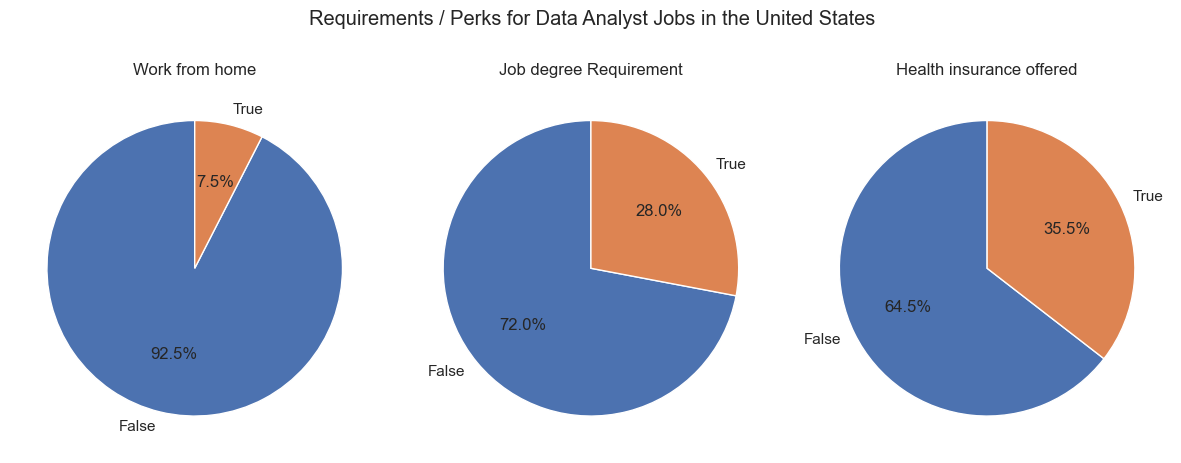

In [4]:
# Pie charts for the 3 job requirements for Data Analyst jobs in the United States.

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

dict_column = {
    'job_work_from_home': 'Work from home', 
    'job_no_degree_mention': 'Job degree Requirement',
    'job_health_insurance': 'Health insurance offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    df_DA_US[column].value_counts().plot(kind='pie', ax=ax[i], startangle=90, autopct='%1.1f%%')
    ax[i].yaxis.set_label_text('')
    ax[i].set_title(title)

fig.suptitle('Requirements / Perks for Data Analyst Jobs in the United States')
fig.tight_layout()
plt.show()

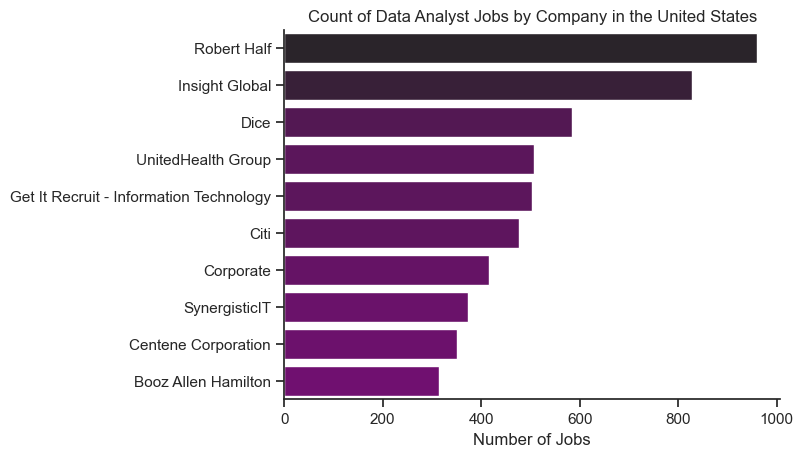

In [5]:
df_companies = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_companies, x='count', y='company_name', hue='count', palette='dark:purple_r', legend=False)
sns.despine()
plt.title('Count of Data Analyst Jobs by Company in the United States')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

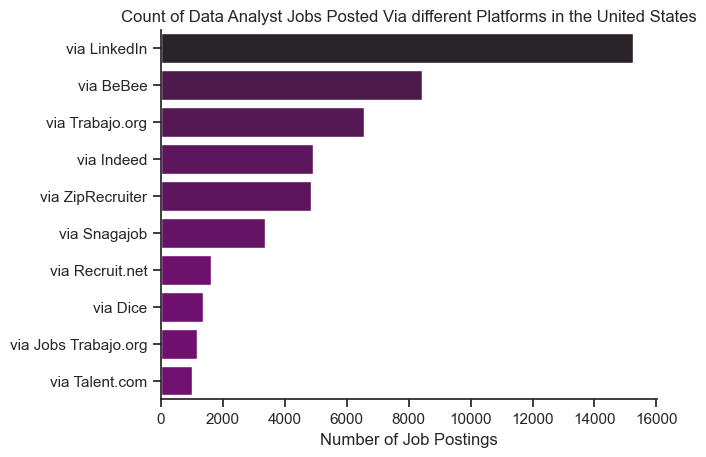

In [6]:
df_Posted_via = df_DA_US['job_via'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_Posted_via, x='count', y='job_via', hue='count', palette='dark:purple_r', legend=False)
sns.despine()
plt.title('Count of Data Analyst Jobs Posted Via different Platforms in the United States')
plt.xlabel('Number of Job Postings')
plt.ylabel('')
plt.show()